In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Overview

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('../processed_data/processed_data.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 10119
Number of features: 9
Example data:
   id       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 NaN  2012-01-01          NaN     NaN         8.0      9.8250   
1 NaN  2012-01-02          NaN     NaN         7.0      7.4375   
2 NaN  2012-01-03          NaN     NaN         8.0      5.5375   
3 NaN  2012-01-04          NaN     NaN         4.0      5.6875   
4 NaN  2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche  
0                 14.0        58.0          NaN  
1                 12.0         NaN          NaN  
2                 18.0        63.0          NaN  
3                 19.0        80.0          NaN  
4                 23.0        80.0          NaN  


# Descriptive Statistics for all variables

In [ ]:
print("=" * 80)
print("DESCRIPTIVE STATISTICS FOR ALL VARIABLES")
print("=" * 80)
print("\n")

# Overall statistics
descriptive_stats = df.describe()
print(descriptive_stats)
print("\n")

# Data types and missing values
print("Data Types and Missing Values:")
print("-" * 80)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{col:20} | Type: {str(df[col].dtype):10} | Missing: {missing_count:6} ({missing_pct:5.2f}%)")


DESCRIPTIVE STATISTICS FOR ALL VARIABLES


                 id  Warengruppe       Umsatz    Bewoelkung    Temperatur  \
count  9.334000e+03  9334.000000  9334.000000  10048.000000  10103.000000   
mean   1.559311e+06     3.088172   206.749044      4.748507     12.014560   
std    1.512503e+05     1.489002   144.545189      2.628285      7.212466   
min    1.307011e+06     1.000000     7.051201      0.000000    -10.250000   
25%    1.410123e+06     2.000000    96.897441      3.000000      6.250000   
50%    1.601102e+06     3.000000   161.900831      6.000000     11.625000   
75%    1.704223e+06     4.000000   280.644663      7.000000     17.875000   
max    1.807315e+06     6.000000  1879.461831      8.000000     32.671428   

       Windgeschwindigkeit   Wettercode  KielerWoche  
count         10103.000000  7581.000000        250.0  
mean             11.026527    37.072022          1.0  
std               4.131774    27.207627          0.0  
min               3.000000     0.000000    

# Visualizations for Numeric Variables

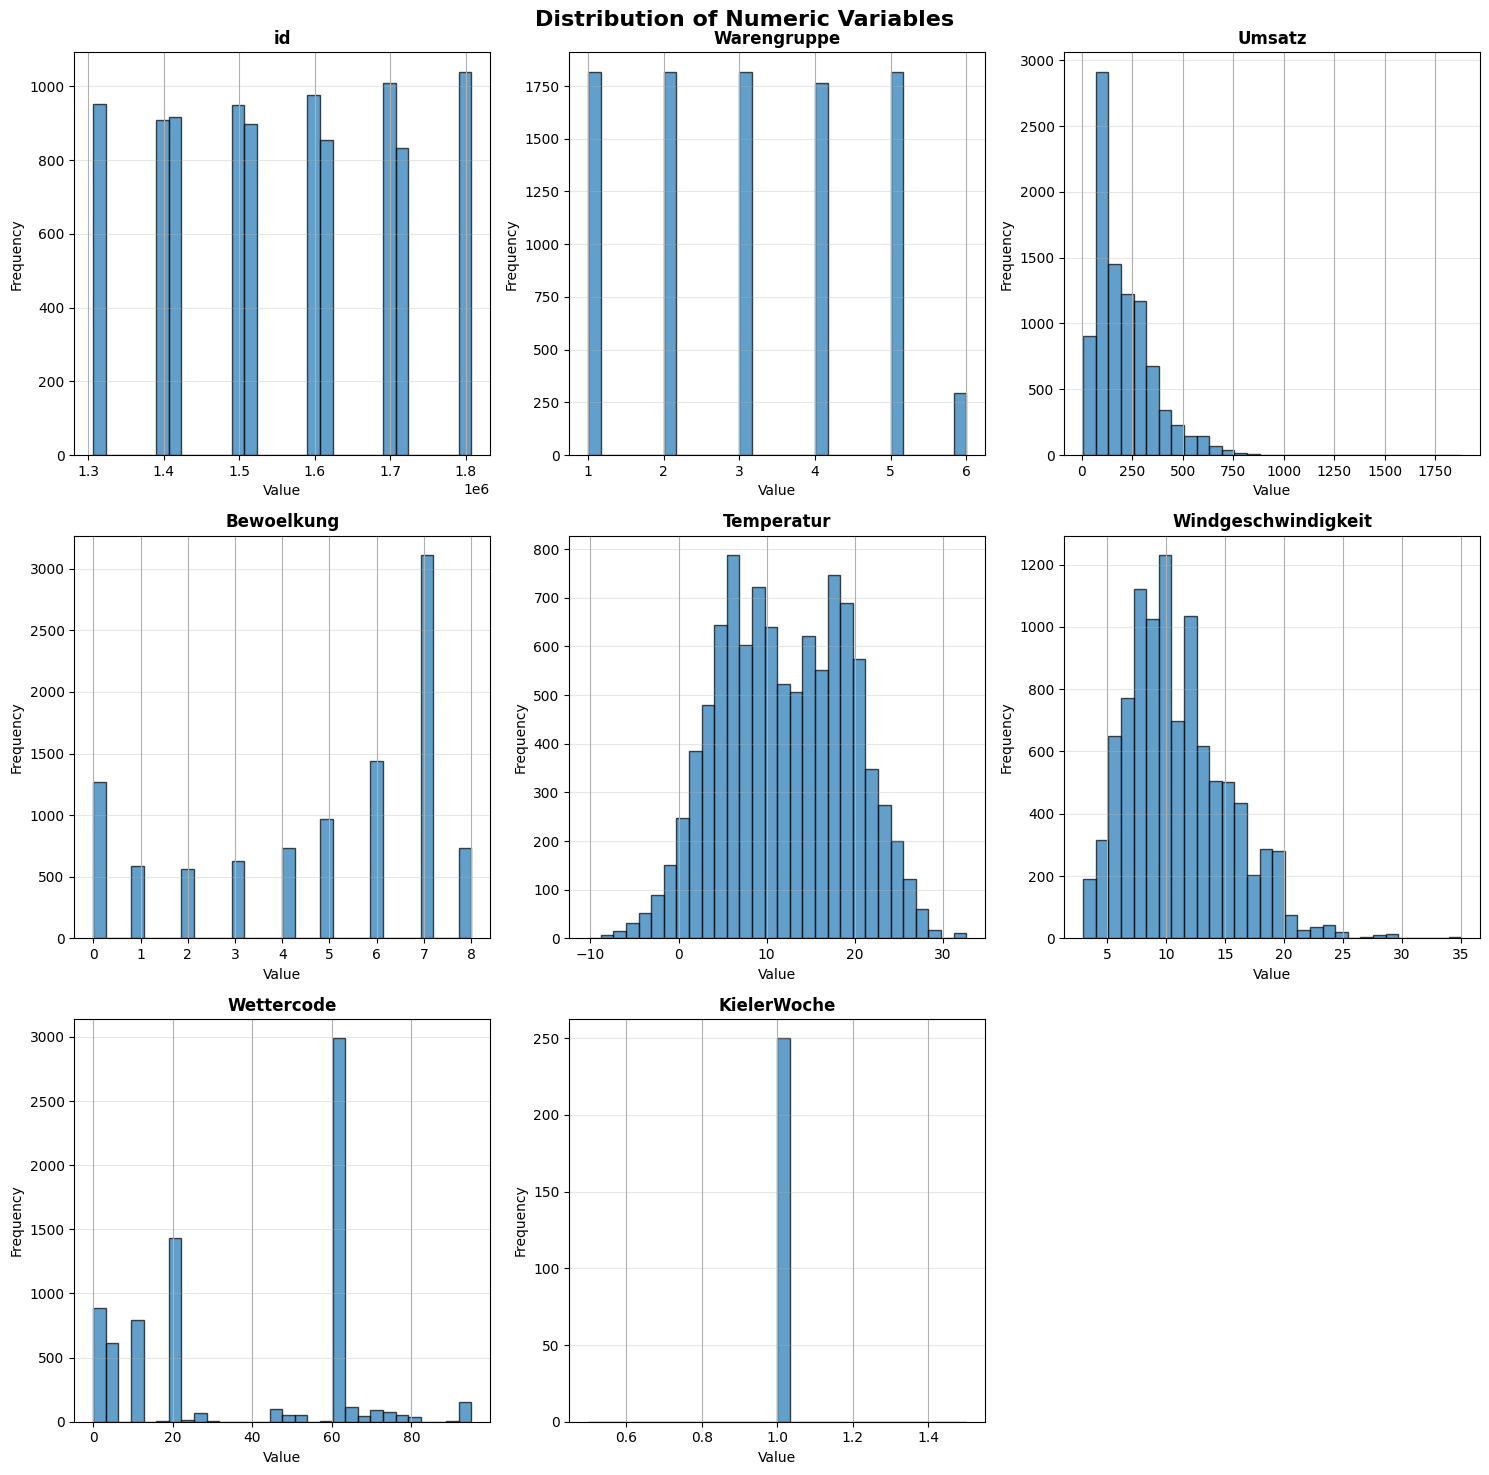

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # Calculate rows needed for 3 columns

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Distribution of Numeric Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Create histogram with KDE
    df[col].dropna().hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.3)

# Hide unused subplots
for idx in range(n_cols, n_rows * 3):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

print("\n")


# Box plots for Numeric Variables

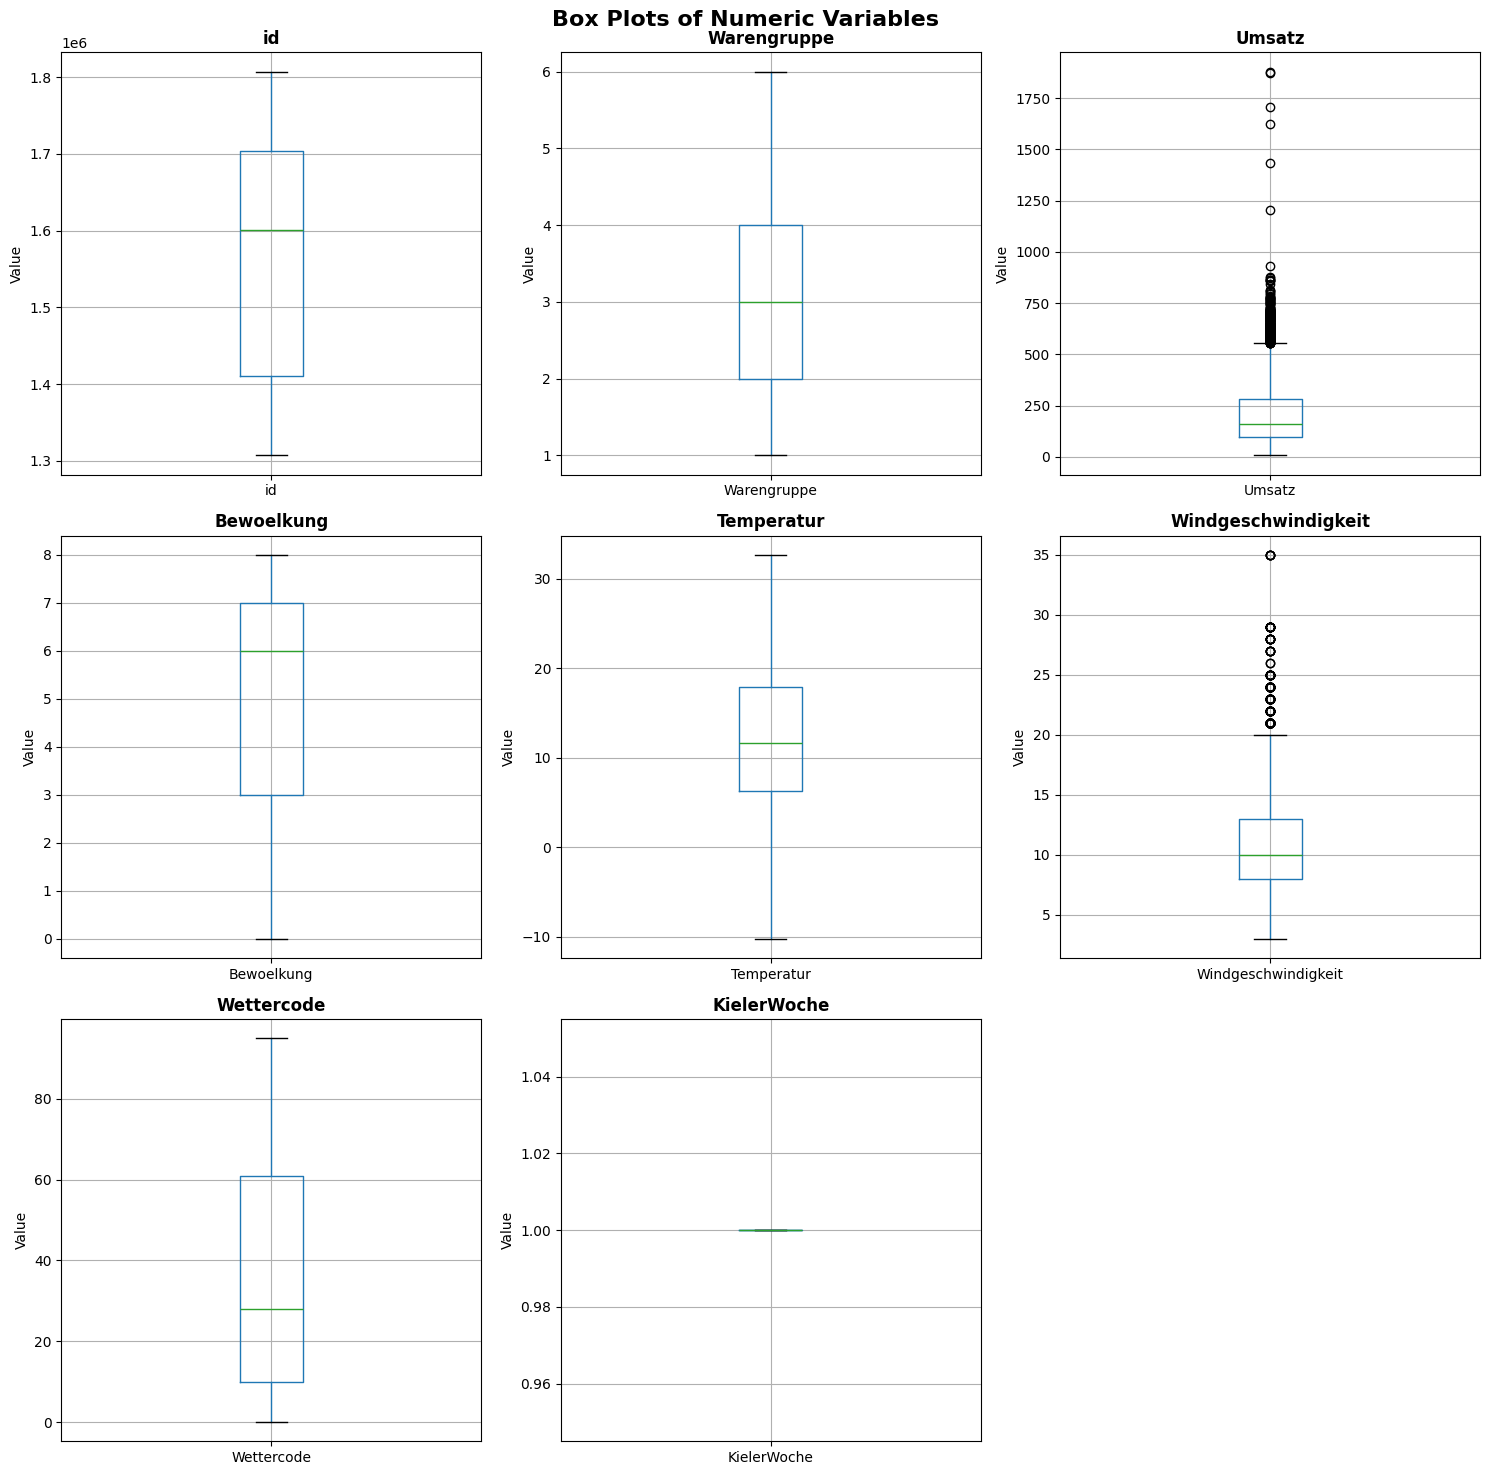

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols_box = len(numeric_cols)
n_rows_box = (n_cols_box + 2) // 3

fig, axes = plt.subplots(n_rows_box, 3, figsize=(15, 5*n_rows_box))
if n_rows_box == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Box Plots of Numeric Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col, fontweight='bold')
    ax.set_ylabel('Value')

# Hide unused subplots
for idx in range(n_cols_box, n_rows_box * 3):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

print("\n")


# Correlation Heatmap

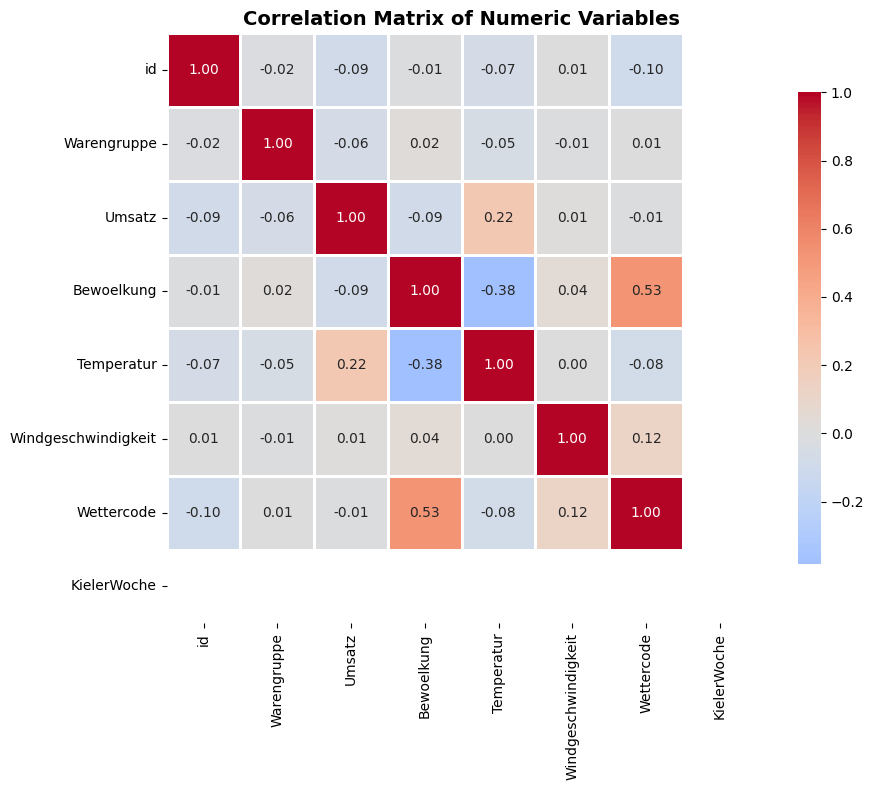

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n")


# Statistical Summary for Weather-Related Variables

In [ ]:
print("=" * 80)
print("DETAILED STATISTICS FOR WEATHER VARIABLES")
print("=" * 80)
print("\n")

weather_vars = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

for var in weather_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        print("-" * 40)
        print(f"  Mean:       {df[var].mean():.4f}")
        print(f"  Median:     {df[var].median():.4f}")
        print(f"  Std Dev:    {df[var].std():.4f}")
        print(f"  Min:        {df[var].min():.4f}")
        print(f"  Max:        {df[var].max():.4f}")
        print(f"  Q1 (25%):   {df[var].quantile(0.25):.4f}")
        print(f"  Q3 (75%):   {df[var].quantile(0.75):.4f}")
        print(f"  IQR:        {df[var].quantile(0.75) - df[var].quantile(0.25):.4f}")
        print(f"  Skewness:   {df[var].skew():.4f}")
        print(f"  Kurtosis:   {df[var].kurtosis():.4f}")

print("\n")


DETAILED STATISTICS FOR WEATHER VARIABLES



BEWOELKUNG:
----------------------------------------
  Mean:       4.7485
  Median:     6.0000
  Std Dev:    2.6283
  Min:        0.0000
  Max:        8.0000
  Q1 (25%):   3.0000
  Q3 (75%):   7.0000
  IQR:        4.0000
  Skewness:   -0.6516
  Kurtosis:   -0.9841

TEMPERATUR:
----------------------------------------
  Mean:       12.0146
  Median:     11.6250
  Std Dev:    7.2125
  Min:        -10.2500
  Max:        32.6714
  Q1 (25%):   6.2500
  Q3 (75%):   17.8750
  IQR:        11.6250
  Skewness:   0.0066
  Kurtosis:   -0.7540

WINDGESCHWINDIGKEIT:
----------------------------------------
  Mean:       11.0265
  Median:     10.0000
  Std Dev:    4.1318
  Min:        3.0000
  Max:        35.0000
  Q1 (25%):   8.0000
  Q3 (75%):   13.0000
  IQR:        5.0000
  Skewness:   0.9099
  Kurtosis:   1.3357

WETTERCODE:
----------------------------------------
  Mean:       37.0720
  Median:     28.0000
  Std Dev:    27.2076
  Min:        0.0000


# Pair plot

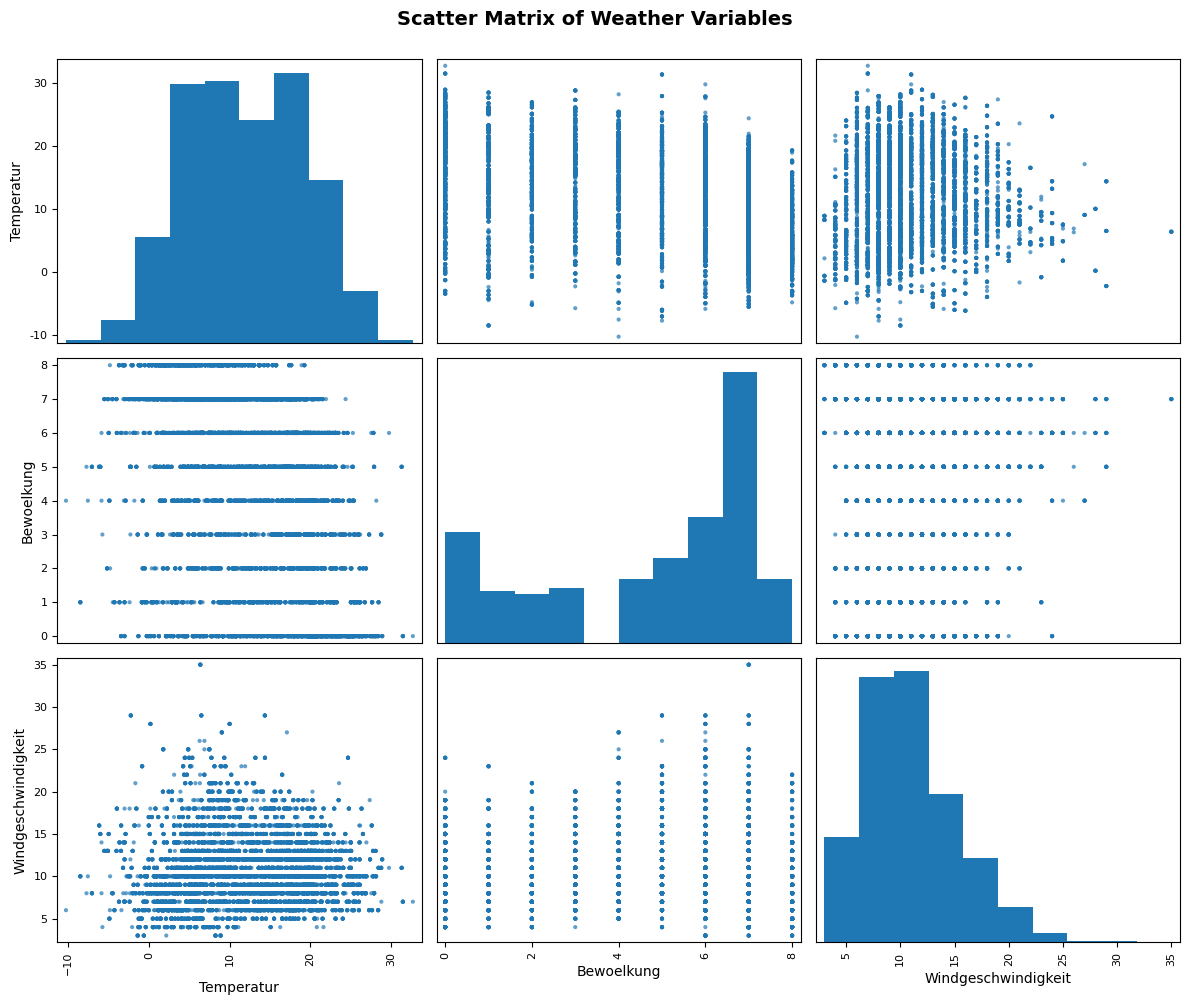

In [9]:
# Pair plot to visualize relationships between weather variables
from pandas.plotting import scatter_matrix

weather_cols = ['Temperatur', 'Bewoelkung', 'Windgeschwindigkeit']
scatter_matrix(df[weather_cols].dropna(), figsize=(12, 10), diagonal='hist', alpha=0.7)
plt.suptitle('Scatter Matrix of Weather Variables', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n")


# Distribution of Categorical Variables

CATEGORICAL VARIABLES ANALYSIS


Warengruppe (Product Group) Distribution:
Warengruppe
1.0    1819
2.0    1819
3.0    1819
5.0    1819
4.0    1766
NaN     785
6.0     292
Name: count, dtype: int64
Unique values: 6


KielerWoche Distribution:
KielerWoche
NaN    9869
1.0     250
Name: count, dtype: int64
Unique values: 1




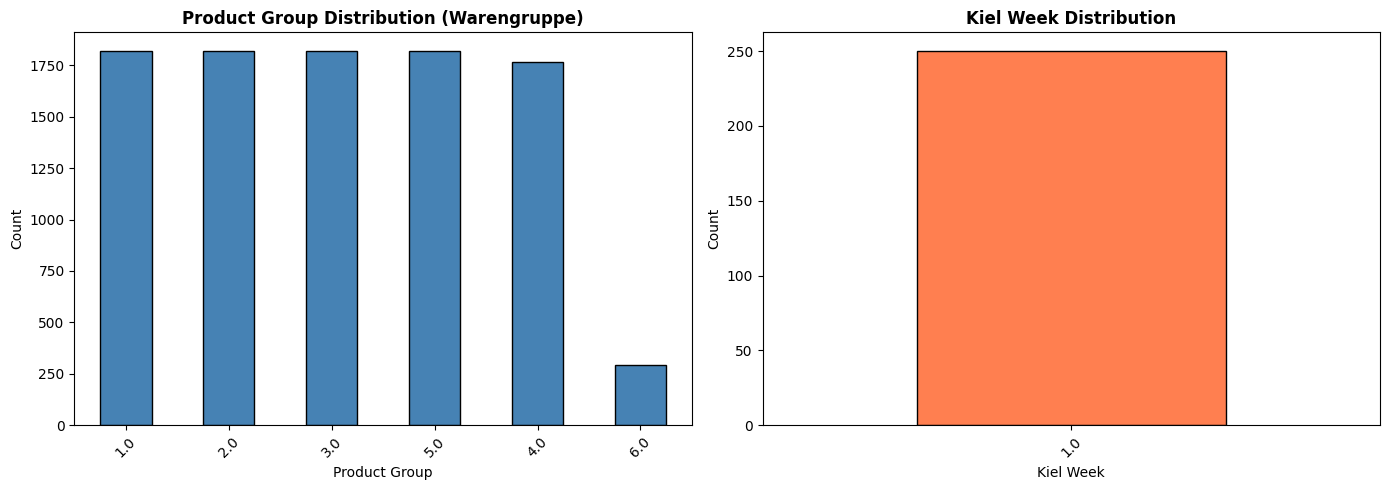

In [ ]:
print("=" * 80)
print("CATEGORICAL VARIABLES ANALYSIS")
print("=" * 80)
print("\n")

# Check unique values for key categorical columns
if 'Warengruppe' in df.columns:
    print("Warengruppe (Product Group) Distribution:")
    print(df['Warengruppe'].value_counts(dropna=False))
    print(f"Unique values: {df['Warengruppe'].nunique()}")
    print("\n")

if 'KielerWoche' in df.columns:
    print("KielerWoche Distribution:")
    print(df['KielerWoche'].value_counts(dropna=False))
    print(f"Unique values: {df['KielerWoche'].nunique()}")
    print("\n")

# Bar plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Warengruppe
if 'Warengruppe' in df.columns:
    warengruppe_counts = df['Warengruppe'].value_counts()
    warengruppe_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title('Product Group Distribution (Warengruppe)', fontweight='bold')
    axes[0].set_xlabel('Product Group')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

# KielerWoche
if 'KielerWoche' in df.columns:
    kieler_counts = df['KielerWoche'].value_counts().sort_index()
    kieler_counts.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
    axes[1].set_title('Kiel Week Distribution', fontweight='bold')
    axes[1].set_xlabel('Kiel Week')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n")
